# Plotting tutorial

This tutorial explains how to plot the main figures of the paper.

The main steps are:

* extract the `targets` descriptors from the dataset
* compute the `predictions` with your ML model
* unnormalize the `targets` and the `predictions` so they have a real physical meaning. This is important as we want to know for instance the physical standard deviation of the predicted aggregate sizes.
* plot the figures

## Import stuff

We import the librairies. We also import the scaler used. It could be any scaler. I personnaly used the `sklearn.preprocessing.MinMaxScaler`.

In [15]:
import sys
from pathlib import Path

repo_path = Path("/home/matias/microstructure-reconstruction")
sys.path.append(str(repo_path))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from tools.plotting import plot_correlation, plot_horizontal_bars, plot_kde, plot_hist

%reload_ext autoreload
%autoreload 2

## Create fake data

This is only for the demonstration. 

* we create 480 and 120 instances of 30 descriptors in [-100, 100]. The name of the descriptors are very dummy as it is just `descriptor_{i}`.
* we fit the scaler using the training data 
* we scale the training and test data using the scaler
* we create predictions

> Note: the data must be stored in a DataFrame with named columns !

### Creating the fake data

(for demonstration purpose only)

In [2]:
nb_descriptors = 30
size_training_set = 480
size_test_set = 120

descriptor_names = [f"descriptor_{i}" for i in range(30)]

training_data = np.random.normal(
    loc=1, scale=30, size=(size_training_set, nb_descriptors)
)
test_data = np.random.normal(loc=1, scale=30, size=(size_test_set, nb_descriptors))

training_df = pd.DataFrame(training_data, columns=descriptor_names)
test_df = pd.DataFrame(test_data, columns=descriptor_names)

print("Size training DataFrame:", training_df.shape)
print("Size test DataFrame:", test_df.shape)


Size training DataFrame: (480, 30)
Size test DataFrame: (120, 30)


### Fitting the scaler

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(training_df)

MinMaxScaler()

### Scaling the test and training data

In [4]:
normalized_training_df = pd.DataFrame(
    scaler.transform(training_df), columns=training_df.columns
)
normalized_test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
print("Normalized test DataFrame")
normalized_test_df.head()

Normalized test DataFrame


,descriptor_0,descriptor_1,descriptor_2,descriptor_3,descriptor_4,descriptor_5,descriptor_6,descriptor_7,descriptor_8,descriptor_9,...,descriptor_20,descriptor_21,descriptor_22,descriptor_23,descriptor_24,descriptor_25,descriptor_26,descriptor_27,descriptor_28,descriptor_29
0,0.225520,0.664217,0.825728,0.179039,0.749003,0.217344,0.568934,0.180693,0.636609,0.513433,...,0.152800,0.481327,0.517058,0.425725,0.152091,0.523061,0.275906,0.998911,0.547885,0.489332
1,0.712078,0.344370,0.383982,0.661057,0.287368,0.527109,0.468171,0.445528,0.412041,0.343062,...,0.448530,0.738121,0.628521,0.554374,0.237838,0.596541,0.284730,0.691779,0.378314,0.292690
2,0.630614,0.480715,0.304165,0.485838,0.376854,0.484246,0.373631,0.779740,0.714376,0.859955,...,0.629569,0.683822,0.420751,0.679204,0.157190,0.226967,0.246963,0.459473,0.636424,0.363113
3,0.285168,0.375692,0.580037,0.194130,0.775067,0.431393,0.421547,0.416271,0.630939,0.560187,...,0.559581,0.557263,0.411690,0.332190,0.219495,0.350385,0.658932,0.522685,0.647752,0.139485
4,0.742046,0.491472,0.124441,0.423981,0.462415,0.479427,0.585426,0.277708,0.542690,0.374047,...,0.561279,0.417253,0.370461,0.649907,0.404717,0.310406,0.494487,0.234624,0.730250,0.281003


### Making fake predictions

(for demonstration purpose only)

In [5]:
# Fake test predictions (this is what interests us the most)
normalized_test_predictions_df = normalized_test_df + np.random.uniform(
    low=-1, high=1, size=(size_test_set, nb_descriptors)
)
print("Size test targets DataFrame:", normalized_test_df.shape)
print("Size test predictions DataFrame:", normalized_test_predictions_df.shape)


Size test targets DataFrame: (120, 30)
Size test predictions DataFrame: (120, 30)


## Plotting anything

We can then plot whatever we want.

### Correlation

We want to plot the correlation of the ground truth descriptors in the whole dataset (`training_df` + `test_df`)

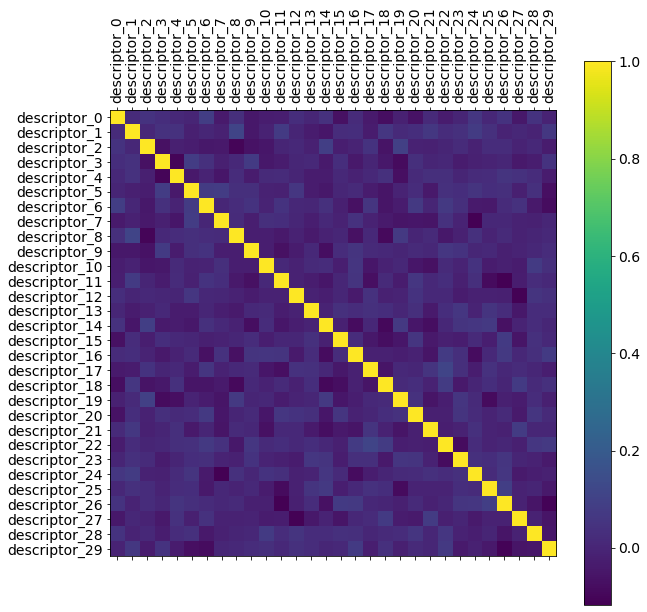

In [6]:
whole_dataset_df = pd.concat([training_df, test_df], axis=0)

ax = plot_correlation(whole_dataset_df)


Let's assume we don't wand to plot every row, and not in that order, we can simply create an `order_of_columns` list which will contain the order and the columns to plot:

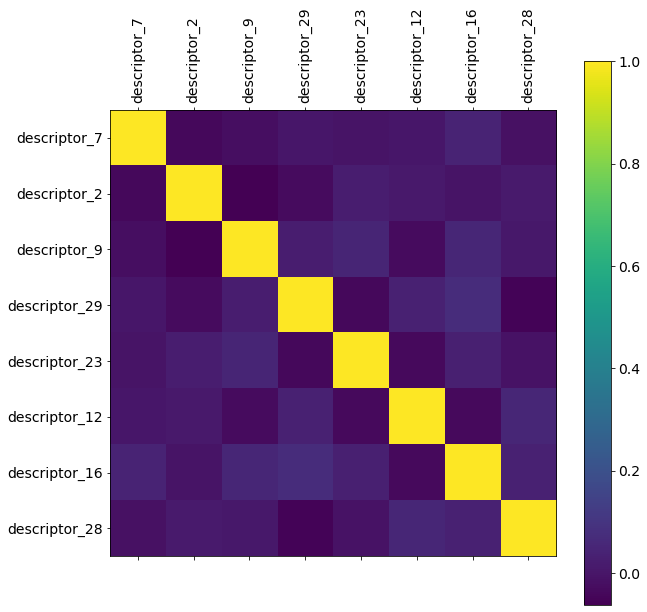

In [7]:
order_of_columns = [
    "descriptor_7",
    "descriptor_2",
    "descriptor_9",
    "descriptor_29",
    "descriptor_23",
    "descriptor_12",
    "descriptor_16",
    "descriptor_28",
]
ax = plot_correlation(whole_dataset_df[order_of_columns])


Let's assume that the name of the descriptors is really ugly, and I want to change them. I can simply create a `column_mapping` dictionnary that maps a descriptor old name to a beautiful descriptor name.

> Note: I can use the r-string in matplotlib to introduce latex notations.

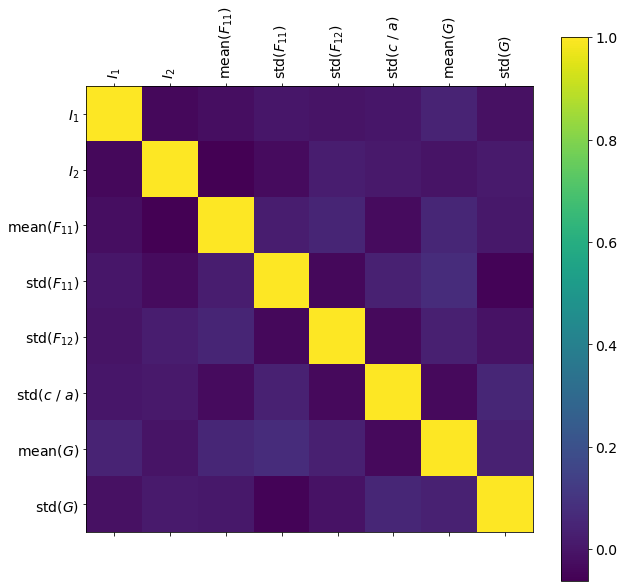

In [8]:
order_of_columns = [
    "descriptor_7",
    "descriptor_2",
    "descriptor_9",
    "descriptor_29",
    "descriptor_23",
    "descriptor_12",
    "descriptor_16",
    "descriptor_28",
]
column_mapping = {
    "descriptor_7": r"$I_1$",
    "descriptor_2": r"$I_2$",
    "descriptor_9": r"mean($F_{11}$)",
    "descriptor_29": r"std($F_{11}$)",
    "descriptor_23": r"std($F_{12}$)",
    "descriptor_12": r"std($c$ / $a$)",
    "descriptor_16": r"mean($G$)",
    "descriptor_28": r"std($G$)",
    "descriptor_30": r"$v_f$",
}

ax = plot_correlation(whole_dataset_df[order_of_columns], column_mapping)

Finally, I can totally custom anything like this:

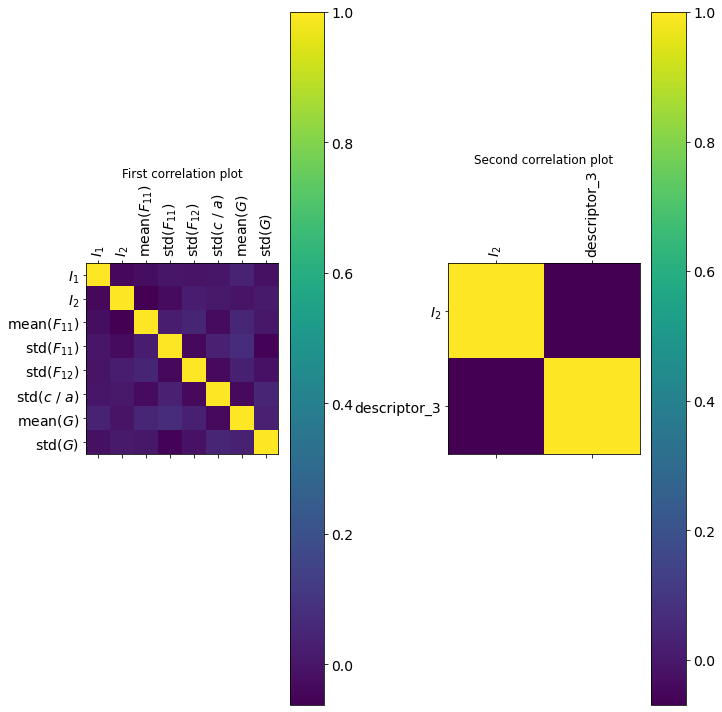

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0] = plot_correlation(whole_dataset_df[order_of_columns], column_mapping, ax[0])
ax[0].set_title("First correlation plot")

ax[1] = plot_correlation(
    whole_dataset_df[["descriptor_2", "descriptor_3"]], column_mapping, ax[1]
)
ax[1].set_title("Second correlation plot")

fig.tight_layout()
plt.show()

### KDE

Similarly, I can make KDE plots between `targets` and `predictions`. 

> Warning: it is really important to make comparable plots. I advise you to make the plot on unnormalized `targets` and unnormalized `predictions`.

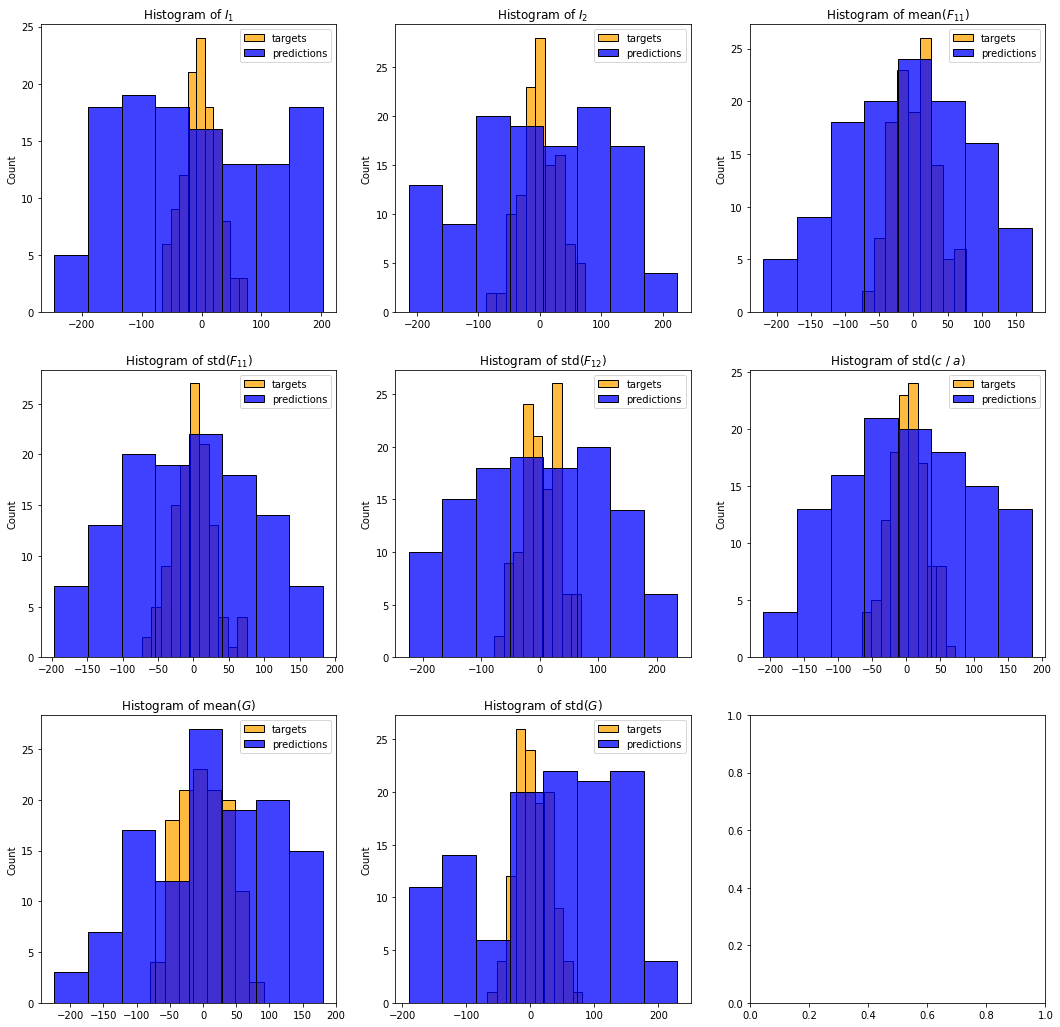

In [29]:
unnormalized_targets = pd.DataFrame(
    scaler.inverse_transform(normalized_test_df), columns=normalized_test_df.columns
)
unnormalized_predictions = pd.DataFrame(
    scaler.inverse_transform(normalized_test_predictions_df),
    columns=normalized_test_predictions_df.columns,
)

# ax = plot_kde(
#     targets=unnormalized_targets[order_of_columns],
#     predictions=unnormalized_predictions[order_of_columns],
#     column_mapping=column_mapping,
#     nb_hist_per_line=3,
# )
ax = plot_hist(
    targets=unnormalized_targets[order_of_columns],
    predictions=unnormalized_predictions[order_of_columns],
    column_mapping=column_mapping,
    nb_hist_per_line=3,
)


### Horizontal bar plot

Finally I can plot the MAE horizontal bar with MAPE annotations.

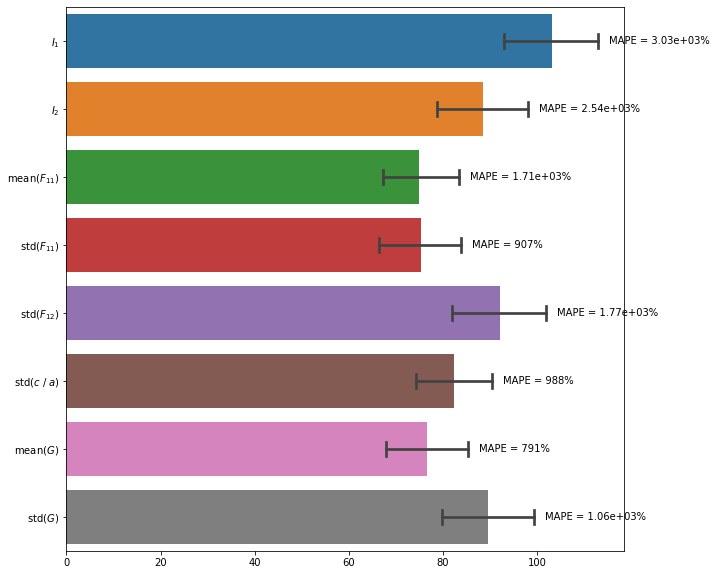

In [11]:
ax = plot_horizontal_bars(
    targets=unnormalized_targets[order_of_columns],
    predictions=unnormalized_predictions[order_of_columns],
    column_mapping=column_mapping,
)


And once again, I can do more complex plots like:

Text(0.5, 0.98, 'Mega title')

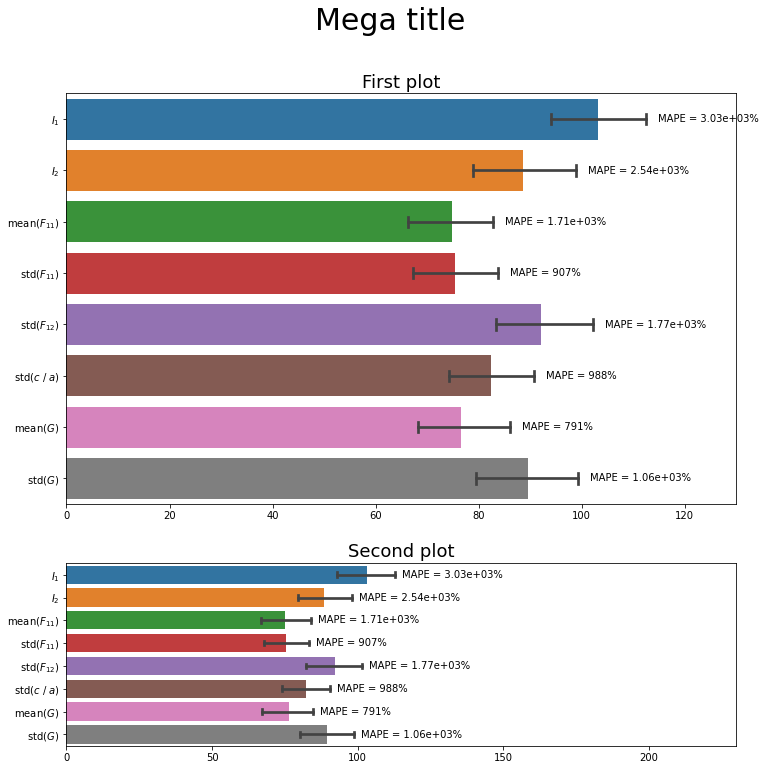

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": [9, 4]})

ax[0] = plot_horizontal_bars(
    targets=unnormalized_targets[order_of_columns],
    predictions=unnormalized_predictions[order_of_columns],
    column_mapping=column_mapping,
    ax=ax[0],
)
ax[0].set_xlim(right=130)
ax[0].set_title("First plot", fontsize=18)

ax[1] = plot_horizontal_bars(
    targets=unnormalized_targets[order_of_columns],
    predictions=unnormalized_predictions[order_of_columns],
    column_mapping=column_mapping,
    ax=ax[1],
)
ax[1].set_xlim(right=230)
ax[1].set_title("Second plot", fontsize=18)

fig.suptitle('Mega title', fontsize=30)